<a href="https://colab.research.google.com/github/aishahijranieputri/Tugas-Python/blob/main/Tugas_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls 

In [3]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [4]:
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [5]:
for imagePath in imagePaths:
	
	image = Image.open(imagePath)
	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [6]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [7]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [8]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [9]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(711, 128, 128, 3)
(237, 128, 128, 3)


In [15]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(128*128*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(64, activation="relu", name="layer2"),
        Dense(64, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               4915300   
_________________________________________________________________
layer2 (Dense)               (None, 64)                6464      
_________________________________________________________________
layer3 (Dense)               (None, 64)                4160      
_________________________________________________________________
layer4 (Dense)               (None, 3)                 195       
Total params: 4,926,119
Trainable params: 4,926,119
Non-trainable params: 0
_________________________________________________________________


In [17]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
23/23 [==============================] - 1s 49ms/step - loss: 4.7476 - accuracy: 0.4023 - val_loss: 1.7613 - val_accuracy: 0.4262
Epoch 2/25
23/23 [==============================] - 1s 43ms/step - loss: 1.5544 - accuracy: 0.5148 - val_loss: 1.0550 - val_accuracy: 0.6034
Epoch 3/25
23/23 [==============================] - 1s 44ms/step - loss: 1.4896 - accuracy: 0.5584 - val_loss: 1.6223 - val_accuracy: 0.5063
Epoch 4/25
23/23 [==============================] - 1s 44ms/step - loss: 1.0902 - accuracy: 0.6554 - val_loss: 1.6601 - val_accuracy: 0.5105
Epoch 5/25
23/23 [==============================] - 1s 43ms/step - loss: 0.9406 - accuracy: 0.6385 - val_loss: 1.2206 - val_accuracy: 0.5696
Epoch 6/25
23/23 [==============================] - 1s 43ms/step - loss: 0.8597 - accuracy: 0.6540 - val_loss: 0.8687 - val_accuracy: 0.7004
Epoch 7/25
23/23 [==============================] - 1s 44ms/step - loss: 0.5530 - accuracy: 0.7890 - val_loss: 0.9146 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


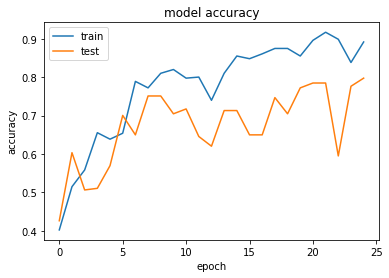

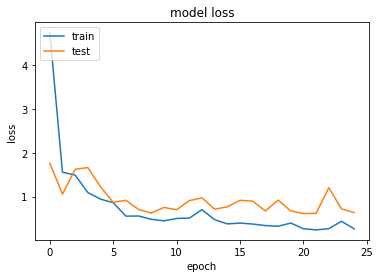

In [18]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.83      0.80      0.82        94
      forest       0.81      0.84      0.82        69
     highway       0.75      0.76      0.75        74

    accuracy                           0.80       237
   macro avg       0.80      0.80      0.80       237
weighted avg       0.80      0.80      0.80       237



In [20]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [46]:
import cv2
import matplotlib.pyplot as plt
image1='Hutan.jpg'

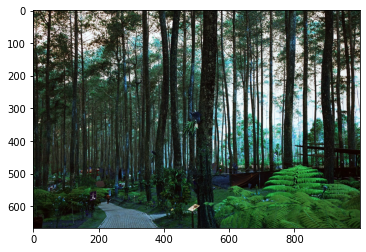

In [47]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [48]:
image_testing = Image.open('Hutan.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [49]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [50]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.14466844 0.5963941  0.25893742]]
['forest']
